# Contents List

(Continued from 4.10 part 1b. Extract active customers)

05. Create profile variable
06. Visualize profile distribution
07. Aggregate summary statistics for each profile's expenditures and order frequency
08. Compare customer profiles with regions and departments
09. Produce charts to visualize your results
10. Export data
11. Additional visualizations and analysis
    a. Order_day_of_week histograms
    b. Loyalty by profile group
    c. Order_hour_of_day histograms
    d. Departmental analysis
    e. Departments by region
    f. Top products by profile


# Import libraries and data

In [1]:
# import libraries (including ones you need for data viz)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create shortcut for data imports
path = r'C:\Users\jacym\Desktop\Career Foundry projects\04-2023 Instacart basket analysis'

In [3]:
# import merged data
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared data', 'orders_customers_regions.pkl'))

# 05. Create profile variable

In [4]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'product_name', 'department_id', 'prices',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'order_frequency', 'frequency_flag', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'region'],
      dtype='object')

I'm designing four customer profiles based on variations in the n_dependants, age, income, fam_status, and avg_price columns. The profiles cover about 55% of the customer base, so they're not all-encompassing, but they capture a wide range of ages, income levels and family situations.

The young parent profile includes people 35 and younger with 1 or more dependants.

The established profile includes people 45 and older with no dependants and income over $75,000.

The young independent profile includes people 35 and younger who are single with no dependants.

The older budgeter profile includes people 55 and older with income less than $50,000 and an average product price of $8 or less.

In [5]:
# create the young parent profile
df.loc[(df['age'] <=35) & (df['n_dependants'] > 0), 'demo_profile'] = 'Young parent'
                                                      

In [6]:
# create the established profile
df.loc[(df['age'] >= 45) & (df['n_dependants'] == 0) & (df['income'] > 75000), 'demo_profile'] = 'Established'

In [17]:
# create the young independent profile
df.loc[(df['age'] <= 35) & (df['n_dependants'] == 0) & (df['fam_status'] == 'single'), 'demo_profile'] = 'Young independent'

In [8]:
# create the budgeter profile
df.loc[(df['age'] >= 45) & (df['income'] < 50000) & (df['avg_price'] <= 8), 'demo_profile'] = 'Budgeter'

In [15]:
# count unique customers in each profile group
df.groupby(['demo_profile'], dropna = False).agg({'user_id': ['nunique']})

,user_id
,nunique
demo_profile,
Budgeter,15889
Established,23292
Young independent,14550
Young parent,43478
NaN,109000


# 06. Visualize profile distribution

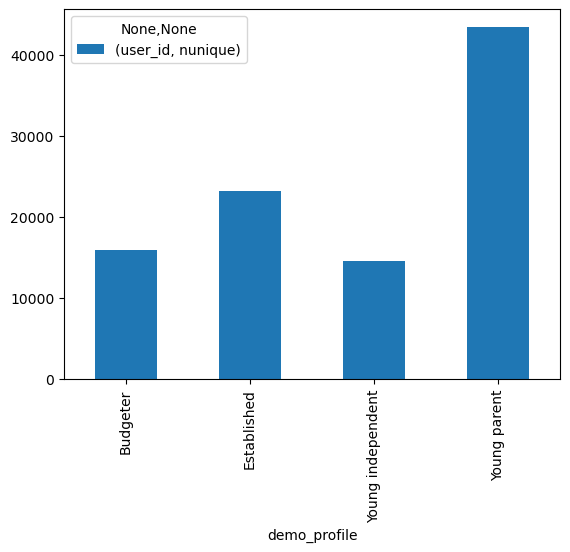

In [17]:
# create a bar graph showing the number of unique user ids in each profile group, including blanks 
profile_bar = df.groupby(['demo_profile']).agg({'user_id': ['nunique']}).plot.bar()

In [13]:
# export chart as png
profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_demo_profiles.png'))

# 07. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure 

In [18]:
# groupby the new profile variable, aggregate descriptive stats for the prices, product_id, add_to_crt_order and order_frequency columns
df.groupby('demo_profile').agg({'prices': ['mean', 'min', 'max', 'sum'], 'product_id': ['count'], 'add_to_cart_order': ['mean'], 'order_frequency': ['mean', 'min', 'max']})


prices                         product_id  \
                       mean   min   max         sum      count   
demo_profile                                                     
Budgeter           6.498424  1.00  25.0  10352282.0    1593045   
Established        7.961371  0.99  25.0  31580452.0    3966710   
Young independent  7.779926  0.99  25.0  17708838.0    2276222   
Young parent       7.785421  0.99  25.0  53487376.0    6870197   

                  add_to_cart_order order_frequency             
                               mean            mean  min   max  
demo_profile                                                    
Budgeter                   7.058769       11.129408  0.0  30.0  
Established                8.507626       10.214293  0.0  30.0  
Young independent          8.357113       10.475343  0.0  30.0  
Young parent               8.425986       10.393267  0.0  30.0

Observations: The established group spends the most per item and the budgeter group spends the least. The budgeter group purchases the fewest products per order, and the established group purchases the most. The established group shops the most frequently, and the budgeter group shops the least frequently.

# 08. Compare customer profiles with regions and departments

In [19]:
# groupby the new profile and region variables, count unique user ids in each subgroup
df.groupby(['demo_profile', 'region']).agg({'user_id': ['nunique']})

user_id
                            nunique
demo_profile      region           
Budgeter          Midwest      3718
                  Northeast    2792
                  South        5285
                  West         4094
Established       Midwest      5447
                  Northeast    4197
                  South        7690
                  West         5958
Young independent Midwest      3312
                  Northeast    2658
                  South        4927
                  West         3653
Young parent      Midwest     10192
                  Northeast    7491
                  South       14578
                  West        11217

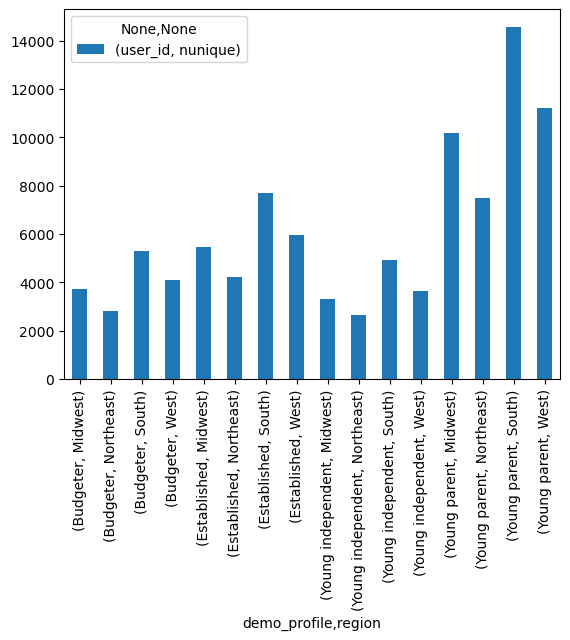

In [20]:
# create bar chart of unique user ids grouped by region and profile
region_bar = df.groupby(['demo_profile', 'region']).agg({'user_id': ['nunique']}).plot.bar()

Observations: The regional distribution is similar across profiles, but there are some slight differences when reviewing the data in Excel. 
Young independents are more likely to be located in the south and northeast. Young parents are more likely to be located in the west and midwest. Across all groups, the regions in order are: South, West, Midwest, Northeast. 

# 09. Produce charts to illustrate your results

Done, see previous charts and additional charts below.

# 10. Export data

In [12]:
df.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_customer_profiles.pkl'))

# 11. Additional visualizations and analysis

a. Order day_of_week histograms

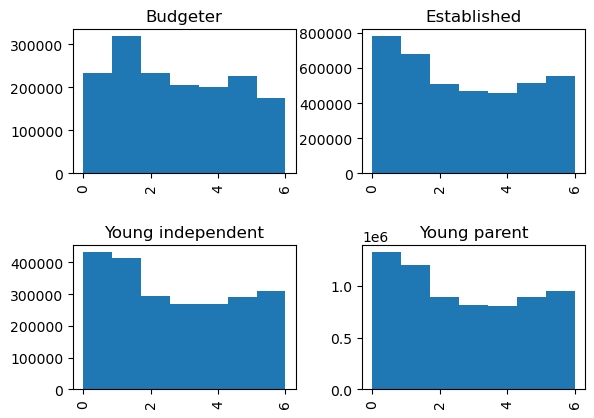

In [21]:
# create a histogram for each profile group's order_day_of_week frequency
demo_hist = df.hist(column='order_day_of_week', by='demo_profile', bins=7)

Observations: The weekly shopping patterns are similar across profile groups, but budgeter customers are more likely to shop on Sundays and Thursdays and less likely to shop on Saturdays than the other groups.

In [ ]:
b. Loyalty by profile group

In [22]:
# groupby demographic profiles and loyalty flag, count unique user ids in each subgroup
df.groupby(['demo_profile', 'loyalty_flag'], dropna = False).agg({'user_id': ['nunique']})

user_id
                                   nunique
demo_profile      loyalty_flag            
Budgeter          Loyal customer      1012
                  New customer        9753
                  Regular customer    5124
Established       Loyal customer      2042
                  New customer       12248
                  Regular customer    9002
Young independent Loyal customer      1160
                  New customer        7979
                  Regular customer    5411
Young parent      Loyal customer      3546
                  New customer       23757
                  Regular customer   16175
NaN               Loyal customer      9257
                  New customer       58591
                  Regular customer   41152

Observations: The established profile has the highest percentage of loyal customers (8.77%) and regular customers (38.65%). The young independent and particularly the budgeter groups have lower levels of loyal and regular customers, so we need to consider ways to increase their return visits. Loyalty-based programs could be advantageous for all three groups, as a way to reward and retain the loyalty of the established group and build loyalty among the young independent and budgeter groups.

c. Order_hour_of_day histograms

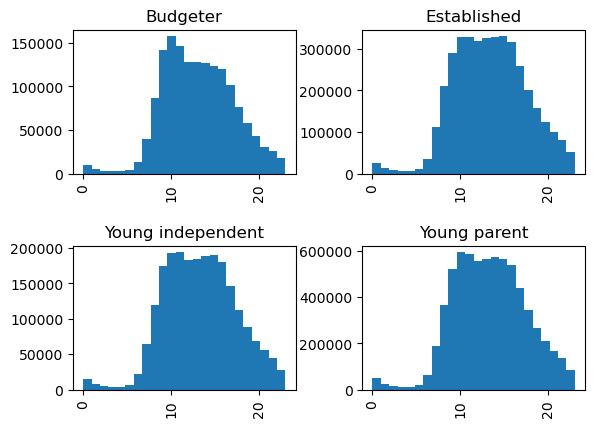

In [23]:
# create histogram of order_hour_of_day frequency for each profile
demo_hist = df.hist(column='order_hour_of_day', by='demo_profile', bins=24)

Observations: The hourly shopping patterns are similar across profile groups, but budgeters show a more pronounced peak at 10 a.m. and a more significant drop-off between noon and 4 p.m.

In [21]:
# export chart as png
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_demo.png'))

In [ ]:
d. Departmental analysis

In [24]:
# expand max rows limit to see full results
pd.options.display.max_rows = 100

In [25]:
# groupby profile and department id and aggregate dept_id count to see number of items each profile purchased per department
df.groupby(['demo_profile', 'department_id']).agg({'department_id': ['count']})

department_id
                                        count
demo_profile      department_id              
Budgeter          1                    101386
                  2                      1788
                  3                     49293
                  4                    382631
                  5                      8738
                  6                      9400
                  7                    190328
                  8                      3634
                  9                     29166
                  10                     2272
                  11                    23218
                  12                    13249
                  13                    77710
                  14                    45091
                  15                    35126
                  16                   230627
                  17                    42869
                  18                    11323
                  19                   282303
                  20                    49665
                  21                     3228
Established       1                    278621
                  2                      4361
                  3                    146866
                  4                   1189753
                  5                     19280
                  6                     34148
                  7                    313427
                  8                     12205
                  9                    109099
                  10                     3905
                  11                    54046
                  12                    92510
                  13                   234632
                  14                    82457
                  15                   133651
                  16                   670028
                  17                    86706
                  18                    54001
                  19                   308641
                  20                   130472
                  21                     7901
Young independent 1                    154222
                  2                      2632
                  3                     83545
                  4                    665847
                  5                     10858
                  6                     19405
                  7                    189378
                  8                      7057
                  9                     61045
                  10                     2396
                  11                    31628
                  12                    48412
                  13                   131573
                  14                    49280
                  15                    75024
                  16                   379622
                  17                    51798
                  18                    30274
                  19                   202568
                  20                    74522
                  21                     5136
Young parent      1                    474701
                  2                      7779
                  3                    248337
                  4                   2002798
                  5                     34069
                  6                     57254
                  7                    560861
                  8                     20668
                  9                    184306
                  10                     7531
                  11                    93493
                  12                   150658
                  13                   397544
                  14                   151331
                  15                   228154
                  16                  1154390
                  17                   155064
                  18                    87131
                  19                   616567
                  20                   222665
                  21                    14896

In [64]:
# For comparison's sake, view dept_id count for whole df
df.groupby('department_id').agg({'department_id': ['count']})

,department_id
,count
department_id,
1,2234743
2,36291
3,1172428
4,9479291
5,153696
6,269253
7,2688123
8,97716


Observations: The top five departments are the same for all profile groups. Beverages is elevated in the established group, and snacks is elevated in the budgeter group. The other top departments for all profiles are produce (always No. 1), dairy/eggs (usually No. 2), frozen (always No. 5). 
Studying a percentage breakdown in Excel and comparing the profiles to all shoppers, I see some differences, mostly slight, among groups. 
Established: More interested in produce and dairy/eggs, less interested in beverages and snacks.
Budgeter: Significantly Less interested in produce, dairy/eggs, significantly more interested in snacks and beverages.
Young independent and young parent groups: Very similar to general profile, but young parents are slightly less interested in produce and beverages, slightly more interested in dairy/eggs. Young independents are slightly less interested in frozen food.

In [27]:
df.groupby(['region', 'department_id']).agg({'department_id': ['count']})

department_id
                                count
region    department_id              
Midwest   1                    524096
          2                      8420
          3                    273869
          4                   2227937
          5                     36186
          6                     63736
          7                    625574
          8                     22355
          9                    203769
          10                     8193
          11                   105749
          12                   166129
          13                   442101
          14                   163551
          15                   250702
          16                  1264223
          17                   175824
          18                    98983
          19                   673715
          20                   245678
          21                    16535
Northeast 1                    390918
          2                      6585
          3                    208599
          4                   1665839
          5                     26542
          6                     46891
          7                    483418
          8                     18601
          9                    151816
          10                     5802
          11                    78815
          12                   124620
          13                   329445
          14                   123574
          15                   186755
          16                   954026
          17                   131485
          18                    75139
          19                   514675
          20                   186817
          21                    12374
South     1                    747900
          2                     12212
          3                    388815
          4                   3160551
          5                     51624
          6                     89142
          7                    898940
          8                     31269
          9                    287444
          10                    11533
          11                   150350
          12                   235752
          13                   622436
          14                   234251
          15                   356015
          16                  1796969
          17                   243070
          18                   143654
          19                   957346
          20                   349419
          21                    23193
West      1                    571829
          2                      9074
          3                    301145
          4                   2424964
          5                     39344
          6                     69484
          7                    680191
          8                     25491
          9                    223598
          10                     9045
          11                   112658
          12                   182426
          13                   481387
          14                   181657
          15                   274586
          16                  1383529
          17                   188287
          18                   106026
          19                   741814
          20                   269335
          21                    17043

Observations: I put these numbers in Excel to study departmental percentages for each group. All regions had the same top categories (Produce, dairy/eggs, snacks, beverages, frozen) and percentages were within .14% of the average across groups.
Differences over .05% (* = .10-.14)
Midwest: More interested in produce, less in snacks and beverages. West: Less interested in beverages*. Northeast: less interested in produce*, frozen, more interested in snacks and beverages*. South: More interested in produce, less interested in snacks.

e. Departments by region

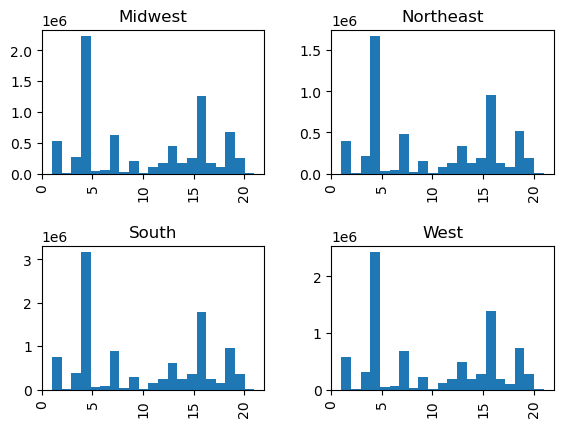

In [5]:
regional_depts_hist = df.hist(column='department_id', by='region', bins=21)

Observations: The distribution of orders across departments is similar for all regions.
Note: I was unable to export the array of histograms, so I screenshotted it and saved it as hist_regional_depts.png in the visualizations folder.

f. View top products for customer profiles

In [14]:
# create subset with only young parents
df_parent = df[df['demo_profile'] == 'Young parent']

In [ ]:
# view top 100 products for young parents
df_parent['product_name'].value_counts()[:100].index.tolist()

In [18]:
# create subset with only young independents
df_indep = df[df['demo_profile'] == 'Young independent']

In [ ]:
# view top 100 products for young independents
df_indep['product_name'].value_counts()[:100].index.tolist()

In [20]:
# create subset with only budgeters
df_budgeter = df[df['demo_profile'] == 'Budgeter']

In [ ]:
# view top 100 products for budgeters
df_budgeter['product_name'].value_counts()[:100].index.tolist()

In [22]:
# create subset with only established shoppers
df_est = df[df['demo_profile'] == 'Established']

In [ ]:
# view top 100 products for established shoppers
df_est['product_name'].value_counts()[:100].index.tolist()